In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from stable_baselines3 import DQN
import random
from gym_unity.envs import UnityToGymWrapper
from animalai.envs.environment import AnimalAIEnvironment

model = DQN.load("results/RL_DQN_3_goal_SA_mlp48/model_2000000")

In [2]:
%env DISPLAY=:99

training = False #Set to false to watch the agent. 
targetFrameRate = -1 if training else 60
captureFrameRate = 0 if training else 60
inference = not training
competition_folder = "configs/competition/"
configuration_files = os.listdir(competition_folder)
configuration_random = random.randint(0, len(configuration_files))
configuration_file = (
    competition_folder + configuration_files[configuration_random]
)
aai_env = AnimalAIEnvironment(
    file_name="../aai_environment/env/AnimalAI",
    arenas_configurations="rl_train_config.yaml",
    play=False,
    inference=inference,
    useCamera=True,
    resolution=128,
    useRayCasts=False,
    raysPerSide=5,
    rayMaxDegrees = 30,
    base_port=5000+random.randint(0,1000)
)
env = UnityToGymWrapper(aai_env, uint8_visual=True, allow_multiple_obs=False, flatten_branched=True)
obs = env.reset()
observation_hist = [obs]
rewards = 0
for i in range(500):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, done, info = env.step(action)
    rewards += reward
    if i % 5 == 0:
        rewards = 0
        observation_hist.append(obs)
    env.render()
    if done:
        obs=env.reset()
        break
env.close()

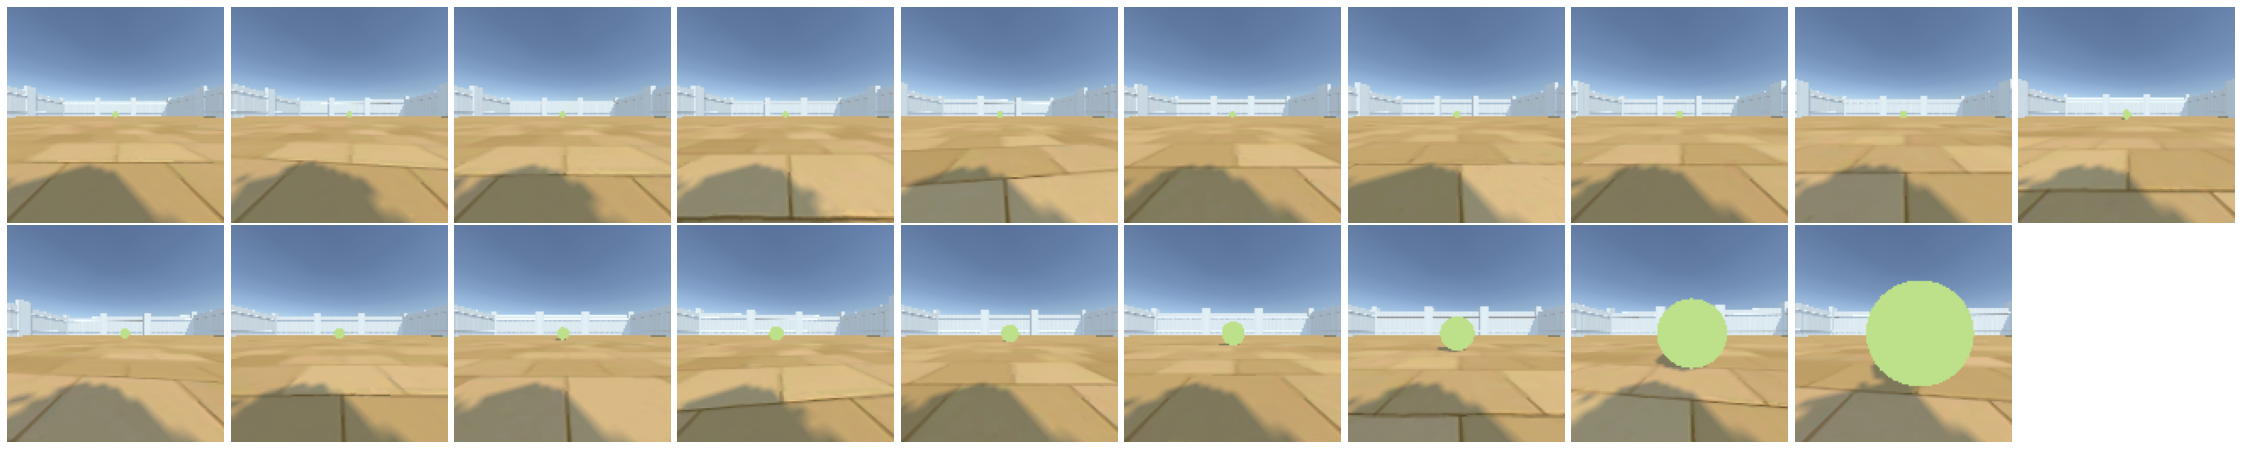

In [7]:
import matplotlib.pyplot as plt
import math 

def plot_skipped_images(skipped_images, columns, size):
    rows = math.ceil(len(skipped_images) / columns)
    f, ax = plt.subplots(rows, columns, figsize=(size * columns, size * rows))
    for i, axis in enumerate(ax.ravel()):
        axis.axis('off')
        if i < len(skipped_images):
            axis.imshow(skipped_images[i])
    plt.subplots_adjust(wspace=0.01, hspace=0.01)
    plt.show

plot_skipped_images(observation_hist, 10, 4)